# Simulation of a simple exchange kinetics between 2 states  $\mathcal{S}_A \rightleftharpoons \mathcal{S}_B$

## Introduction

### Objective of the exercices
1. Play a a bit with the kinetic notions of a simple, known system,  before going to more complex ones.
1. Get accustomed the matricial notations used in Markov State Models theory.
2. Recognize the exponential form of the time evolution of the system.
3. Understand the notion of a propagator.
4. Investigate the information contained in its eigenvalues and eigenvectors.



### Context

We consider a solution of molecules in exchange between 2 states $S_A$ and $S_B$, 
with concentration $[C_A](t)$ and $[C_B](t)$ as a function of time.

The total concentration is noted $[C](t) = [C_A](t) + [C_B](t) $.

The kinetic constant of the reaction from $\mathcal{S}_A$ to $\mathcal{S}_B$ is noted $k_{AB}$. 
The one from $B$ to $A$ is noted  $k_{BA}$. 

We shall simulate  an experiment with a starting compositions $[C_A]_i$ and  $[C_B]_i$, and predict the time evolution. The volume of the solution is considered as constant, and all molecules remain in it.

Two different stategies  to obtain  the concentrations as a function of time  will be compared:
1. calculate analytically the formula using the `sympy` package,  
1. calculate numerically (with an itterative procedure).
 

### Notations
- $t$ the time.
- $\tau$ a small time interval (also named timelag or timestep).
- $S_A$, $S_B$ : states $A$ and $B$, with concentrations $[C_A](t)$ and $[C_B](t)$.
- The kinetic constant of the reaction from $\mathcal{S}_A$ to $\mathcal{S}_B$ is noted $k_{AB}$, and inversely from $B$ to $A$.
- $K^{eq}$ is the equilibrium constant of the equilibrium i.e. $K^{eq} = [C_B]/[C_A] $ at equilibrium.
- $C(t)$ : total concentration of $S_A$ and $S_B$ at time $t$.
- $p_A(t)$ and $p_B(t)$ : probabilities to be in state $A$ and $B$, respectively, at the time $t$.
- $p_A^{eq}$ and $p_B^{eq}$, the corresponding probabilities at equilibrium.

### Reminder about simple kinetics

**QUESTIONS**

1. Make a scheme of the exchange with the kinetic constants. 
2. What can you say about the time evolution of $C$ ?
3. Write how $[C_A](t)$ depends on $C$ and $p_A(t)$. Same question for how $[C_B](t)$ depends on $C$ and $p_B(t)$.
4. From  one of the previous equations, deduce how the equilibrium constant $K$ depends on $k_{AB}$ and $k_{BA}$. How do you write $K^{eq}$ as a function of $p_A^{eq}$ and $p_B^{eq}$  ?
5. Find the expressions of $p_A^{eq}$ and $p_B^{eq}$ as a function of $k_{AB}$ and $k_{BA}$.
6. Write the two time-differential equations for $p_A(t)$ and $p_B(t)$ noted Eq.(A) and Eq.(B) respectively.


### Introduction to matricial notation

**QUESTIONS**
1. Write down Eq.(A) - Eq.(B) and  rewrite introduce the new variable $v(t) = p_A(t)-p_B(t)$. What is the time derivative of $v(t)$ ?
Find a linear combination of $k_{AB}$ and $k_{BA}$ that caracterizes a typical frequency for the time evolution of the system.  

2.  We define a vector 
$ p =
\begin{pmatrix} 
p_A\\
p_B
\end{pmatrix}
$. 
Write the differential equation for $p$ with the form 
$
\frac{dp}{dt} = \hat{k} p
$
where $\hat{k}$ is a $2 \times 2$ matrix that is independant of $t$. This equation is noted Eq.(K).


8. Solve Eq.(K) to obtain the value of $p(t)$ as a function of  $p(t=0)$ , $\hat{k}$ and $t$. Remember that you can define an exponential of a matrix using the Taylor expansion.


We shall note in the following the transformation matrix
$\hat{T}=\exp(t\hat{k})$.

## Analytical Resolution using `sympy`

In the following, you shall first solve numerically Eq(K) using `sympy`.
The next cells are doing these steps :
1. Load the necessary packages
1. Define the different symbolic variables
2. Define the initial probabilities.
3. Define the propagator and finds its eigenvalues and eigenvectors.
4. Solve the equation for the time evolution.
4. Make a numerical resolution and plot the time evolution of the concentration 


<font color='red'>

**ATTENTION**  
</font>
Some cells will produce errors at the compilation !
you need to modify them.
A hint is given ususally with the keywork **TOCOMPLETE** where you have to modify or complete.
Sometimes, you will have to write down several lines of code, sometimes just enter a number...


<font color='red'>

**ATTENTION**  
</font>
There are questions to help you understand the code. You can add cells to answer the questions as markdown or python as in the following cell, using a special color.


<font color='gray'>

**Your answer in a Markdown cell**

</font>

In [1]:
# import all dependencies
import sys
from sympy import *
import mpmath
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import string

sys.modules['sympy.mpmath'] = mpmath



**QUESTIONS**

1. Read and complete the following cell to let it run without error, and to define the expression of $K_{eq}$, as a function of the variables . 




In [2]:
# define the different symbolic calculation variables

pAi = symbols('pai') # initial concentration in A
pBi = symbols('pbi') # initial concentration in B

kAB = symbols('k_AB') # kinetic constant from A to B
kBA = symbols('k_BA') # kinetic constant from B to A

Keq = kAB/kBA # equilibrium constant pB/pA
#Keq = TOCOMPLETE # equilibrium constant pB/pA

t = symbols('t') # time 
tau = symbols('tau') # small time step 

#  initial probability as a vector 
#  a list of elements is considered to be a column vector.
pi = Matrix([pAi,pBi])
#print(pi)

# the first index of the matrix is the length of the column = the number of rows
# the second index is the number of column
# print(shape(pi))

Now define the Matrix  $\hat{k}$ that describes the time derivative of the probability vector $p$.
In `sympy`, the matrix is given  rows by rows. Each row correspond to the list of coefficients for each time derivative  of individual components. The first row correspond to the description of the time derivate of $p_A$,  the second row to the time derivative of $p_B$.

**QUESTIONS**
1. Complete the following cell to define the correct matrix $\hat{k}$ as a function of the variables defined above. 


In [3]:

# Matrix that describes the time derivative of the probabilities
# the matrix is given  rows by rows
# each row corresponds the list of coefficients for each time derivative  of individual components
k = Matrix([[-kAB, kBA], [kAB, -kBA]])
# k = Matrix([[-kAB, kBA], TOCOMPLETE ])

print(f'Matrix k is = {k}')
#print(f'shape of the k matrix = {shape(k)}')
print(f'number of rows    = {shape(k)[0]}')
print(f'number of columns = {shape(k)[1]}')


# just a list to write down the equations
alphabet = list(string.ascii_uppercase)
for row in np.arange(shape(k)[0]) :
    print(f'for compound {alphabet[row]} : coef. of the kinetics differential equations = {list(k.row(row))}')



Matrix k is = Matrix([[-k_AB, k_BA], [k_AB, -k_BA]])
number of rows    = 2
number of columns = 2
for compound A : coef. of the kinetics differential equations = [-k_AB, k_BA]
for compound B : coef. of the kinetics differential equations = [k_AB, -k_BA]


Let us think about the eigenvalues and eigenvectors of $\hat{k}$. 

**QUESTIONS**

1. At equilibrium, what should be the value of $\frac{dp}{dt}$ ?
2. What is the associated eigenvalue for $\hat{k}$ ? 
3. What does the associated eigenvector  bring as information ? 
4. in the following cell, you will add some code to let `sympy` do the calculation for you.


In [4]:
# investigate the eigenvalues of the generator k , especially the one with eigenvalue 0


# describe the eigenvector of this matrix
print(f'=> All Eigenvectors of k ')
eigen = k.eigenvects()
for e in eigen :
    eigenvalue, multiplicity, vector = e
    print(f'\neigenvalue = {eigenvalue.simplify()}, multiplicity = {multiplicity}, vector = {vector}')


print(f"\n\n=>Find the eigenvalue 0...")
for e in eigen :
    eigenvalue, multiplicity, vector = e   
    if eigenvalue == 0.0 :
#    if eigenvalue == TOCOMPLETE :

        print(f"Eigenvalue == 0  found!")
        vector0 = vector[0]
        print(f'eigenvector = {vector0}')

        #normalisation of the vector
        sum = 0.0
        for value in vector0:
            sum=sum+value
#           sum=TOCOMPLETE
        vector_normalized = vector0/sum

        # extract the expressions
        expr_pA_eq = vector_normalized[0].simplify()
        expr_pB_eq = vector_normalized[1].simplify()
        print(f"\nEquilibrium distribution after normalisation :")
        print(f'pA_eq = {expr_pA_eq}')
        print(f'pB_eq = {expr_pB_eq}')

#print(f'=> Action of matrix k onto vector p')
#print(k*pi)



=> All Eigenvectors of k 

eigenvalue = 0, multiplicity = 1, vector = [Matrix([
[k_BA/k_AB],
[        1]])]

eigenvalue = -k_AB - k_BA, multiplicity = 1, vector = [Matrix([
[-1],
[ 1]])]


=>Find the eigenvalue 0...
Eigenvalue == 0  found!
eigenvector = Matrix([[k_BA/k_AB], [1]])

Equilibrium distribution after normalisation :
pA_eq = k_BA/(k_AB + k_BA)
pB_eq = k_AB/(k_AB + k_BA)


**QUESTION**
1. Verify that the equilibrium eigenvector is consistent with your answer at the section *Reminder about simple kinetics* 

Now you will let `sympy` also calculate the full solution for any time $t$.

**QUESTIONS**
1. Complete the following cell to insert the correct mathematical expression for $p(t)$ noted here `pt`.
2. Complete the following cell to let the two analytical expressions be printed.

In [5]:
# define a matrix description of the time evolution
# the evolution matrix is BEFORE the probability vector
pt = simplify(exp(t*k)*pi)
#pt = simplify(exp(t*TOCOMPLETE)*pi)

pprint(f'pA(t) = {pt[0]}')

#pprint(f'pB(t) = {pt[1]}')
pprint(f'pB(t) = {pt[1]}')

pA(t) = (-k_BA*pbi*(1 - exp(t*(k_AB + k_BA))) + pai*(k_AB + k_BA*exp(t*(k_AB +
 k_BA))))*exp(-t*(k_AB + k_BA))/(k_AB + k_BA)
pB(t) = (-k_AB*pai*(1 - exp(t*(k_AB + k_BA))) + pbi*(k_AB*exp(t*(k_AB + k_BA))
 + k_BA))*exp(-t*(k_AB + k_BA))/(k_AB + k_BA)


In the following cell, you will let `sympy` and `numpy` make the numerical application

**QUESTIONS**
1. Complete the lines with *TOCOMPLETE*  keywords
2. Verify that the initial  and final concentrations are reasonable.
2. Play with the numerical values for the different variables.

Dictionnary of the parameter values = {k_AB: 4.0, k_BA: 1.0, pai: 1.0, pbi: 0.0, tau: 0.02}
pA(t) = 0.2 + 0.8*exp(-5.0*t)
pB(t) = 0.8 - 0.8*exp(-5.0*t)


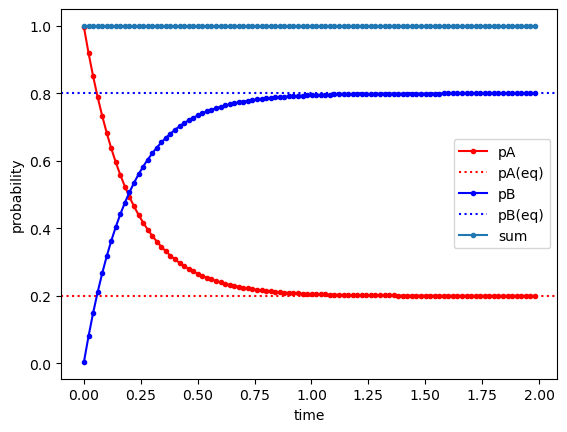

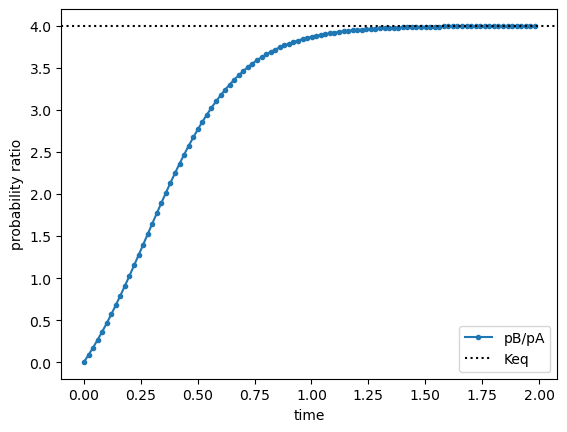

In [6]:

# make a numerical application a see how the proabilities evolve in time
# the substitution is done with a dictionnary 
# that provides a numerical value for each of the variables
subs = {kAB : 4.0, kBA : 1.0, pAi : 1.0 , pBi :0.0, tau: 0.05}
print(f'Dictionnary of the parameter values = {subs}')


# equilibrium distribution
pA_eq  = expr_pA_eq.evalf(subs=subs)
# pB_eq  = TOCOMPLETE
pB_eq  = expr_pB_eq.evalf(subs=subs)

# define the time functions using the given parameters
pAt = pt[0].evalf(subs=subs).simplify()
pBt = pt[1].evalf(subs=subs).simplify()
print(f'pA(t) = {pAt}')
print(f'pB(t) = {pBt}')

# define the python functions associated to the symbolic expressions
pAf = lambdify(t, pAt ,["scipy", "numpy"] )
pBf = lambdify(t, pBt ,["scipy", "numpy"] )
# pBf  = TOCOMPLETE
sumf = lambdify(t, pAt+pBt ,["scipy", "numpy"] )

# define reasonable time range, avoid to divide by 0
tmax = float((10/(kAB+kBA)).evalf(subs=subs))
tstep = float(tau.evalf(subs=subs))
t_list= np.arange(0.001,tmax,tstep)

#calculate the probabilities and the equilibrium ones
pA_list = [ pAf(t) for t in t_list ]
pB_list = [ pBf(t) for t in t_list ]
# pB_list  = TOCOMPLETE

sum_list = [sumf(t) for t in t_list ]
ratio_list = [pBf(t)/pAf(t) for t in t_list if pAf(t) > 0 ]

# plot probabilities as a function of time
fig, ax = plt.subplots()
ax.plot(t_list, pA_list,'.-',label='pA',color='r')
ax.axhline(y=pA_eq,label='pA(eq)',linestyle=":",color='r')
ax.plot(t_list, pB_list,'.-',label='pB',color='b')
ax.axhline(y=pB_eq,label='pB(eq)',linestyle=":",color='b')
ax.plot(t_list, sum_list,'.-',label='sum')
# ax.set_xlabel('TOCOMPLETE')
ax.set_xlabel('time')
ax.set_ylabel('probability')
plt.legend()
plt.show()

# plot probabilities ratio as a function of time
fig, ax = plt.subplots()
ax.plot(t_list, ratio_list,'.-',label='pB/pA')
ax.axhline(y = Keq.evalf(subs=subs),label = "Keq",color='k',linestyle=":")
ax.set_xlabel('time')
ax.set_ylabel('probability ratio')
plt.legend()
plt.show()


## Numerical itterative calculation of the time evolution

Now we change the point of view in order to go towards more complex systems, where `sympy` will no longer be able to calculate explicitely the time evolution.

We shall calculate $p(t)$ at timesteps $\tau$, $2\tau$, $3\tau$,...
with a small timestep $\tau$. We keep the matricial formalism and write
the time evolution as :

$
p(t+\tau) = \hat{P}_\tau ~~ p(t+\tau)
$

where $\hat{P}_\tau$ is a $2\times2$ propagator matrix that depends on the timestep $\tau$.

**QUESTIONS**
1. If $\tau$ is small, we can approximate  $\hat{P}_\tau$ with the Taylor expansion of the matrix $T$ seen previously. What is the expression for $\hat{P}_\tau$ up to order 1 ?
2. In the following cells, complete the lines to make them run. 

Hints for `sympy`,:
- the identity matrix in `n` dimensions can be called using `eye(n)`.
- you can simply multiply the variables of a scalar `a` with a matrix `m` using `a * m`

In [7]:

# same kinetics, but change for PROPAGATOR formalism
# P is the propagator
# It evolves the probability after a small time tau depending on the probability at time t
P = eye(2) + tau * k 
#P = TOCOMPLETE
P_dimension = shape(P)[0]

print(f"Description of the propagator for a timestep {tau}")
for row in np.arange(P_dimension) :
    print(f'for compound {alphabet[row]} : coef. propagator = {list(P.row(row))}')


Description of the propagator for a timestep tau
for compound A : coef. propagator = [-k_AB*tau + 1, k_BA*tau]
for compound B : coef. propagator = [k_AB*tau, -k_BA*tau + 1]


**QUESTIONS**
1. What is the eigenvalue of the propagator $\hat{P}_\tau$ that describes that the  probability $p_{eq}$  does not evolve in time ?
2. In the next cell, complete the lines and verify that you get find this eigenvalue and the correct eigenvector.


In [8]:

# investigate the eigenvalues of the propagator
print(f"\n=>Eigenvalues of the propagator")
eigen = P.eigenvects()
for e in eigen :
    eigenvalue, multiplicity, vector = e
    print(f'\neigenvalue = {eigenvalue}, multiplicity = {multiplicity}, vector = {vector}')

print(f"Find the eigenvalue 1...")
for e in eigen :
    eigenvalue, multiplicity, vector = e   
    if eigenvalue == 1.0 :
#    if eigenvalue == TOCOMPLETE :

        print(f"Eigenvalues = 1  ! \n")
        vector0 = vector[0]
        print(f'eigenvector = {vector0}')

        sum = 0.0
        for value in vector0:
            sum=sum+value
        vector_normalized = vector0/sum
        exprA = vector_normalized[0].simplify()
        exprB = vector_normalized[1].simplify()

        print(f"equilibrium distribution :")
        print(f'pA = {exprA}')
        print(f'pB = {exprB}')


=>Eigenvalues of the propagator

eigenvalue = 1, multiplicity = 1, vector = [Matrix([
[k_BA/k_AB],
[        1]])]

eigenvalue = -k_AB*tau - k_BA*tau + 1, multiplicity = 1, vector = [Matrix([
[-1],
[ 1]])]
Find the eigenvalue 1...
Eigenvalues = 1  ! 

eigenvector = Matrix([[k_BA/k_AB], [1]])
equilibrium distribution :
pA = k_BA/(k_AB + k_BA)
pB = k_AB/(k_AB + k_BA)


### Calculate numerically the time evolution

The next cells do the following steps :
1. using the same numerical values as previously, calculate the numerical values for the propagator.
2. Using this propagator, create a list containing the probability vectors $p(0),p(\tau), p(2\tau),...$   
3. Plot the probabilities as a function of time and compare to the previous analytical solutions.

In [9]:
# Calculate again the time evolution using the propagator P
# using the numerical P_num
P_num = P.evalf(5,subs=subs)

print(f'Numerical value of the propagator P for a timestep {tau.evalf(2,subs=subs)}')
for row in np.arange(P_dimension) :
    print(f'for compound {alphabet[row]} : P_{row} = {list(P_num.row(row))}')

Numerical value of the propagator P for a timestep 0.020
for compound A : P_0 = [0.92000, 0.020000]
for compound B : P_1 = [0.080000, 0.98000]


**QUESTIONS**
1. In the next cell, complete the lines with *TOCOMPLETE* to calculate `p_new`  using the numerical propagator `P_num` and the previous probability vector `p_old`.


In [10]:
# calculate the time evolution of the concentration
# p(t+tau) = P(tau) * p(t)

# initialize the vector p(t) at time 0 and put in a list that will evolve in time
# the first index of the matrix is the number of rows
# the second index is the number of column
pi_num = Matrix([pAi,pBi]).evalf(2,subs=subs)
pt_tau_list = [ pi_num ]

# create an array to store the values in a convenient way for plotting
# initialize it at zero values from pt_tau_list
shape = (P_dimension,len(t_list))
pt_array = np.zeros(shape=shape, dtype=float)
for row in np.arange(P_dimension):
    pt_array[row,0] = pt_tau_list[0][row]

# calculate step by step 
for i,t in enumerate(t_list[1:]) :
    t_old = t_list[i]
    p_old = pt_tau_list[i]
    
    if abs ( (t-t_old) - tau.evalf(2,subs=subs)) < 0.01 :
        p_new = P_num*p_old
        #newp = TOCOMPLETE
        pt_tau_list.append(p_new)
        for row in np.arange(P_dimension):
            pt_array[row,i+1] = p_new[row]
       
    else :
        print(f'the time list does not contain time step of tau')
        print(f' i = {i}, t_old ={t_old} , t = {t}')

#print(pt_tau_list)


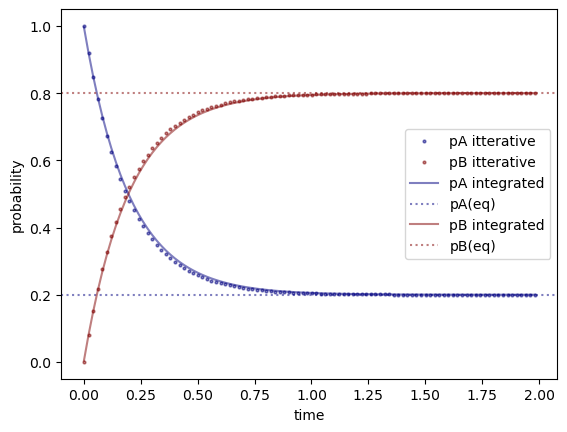

In [11]:
# plot probabilities as a function of time

# define as much colors as dimensions 
cm_subsection = np.linspace(0, 1, P_dimension) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig, ax = plt.subplots()
for row in np.arange(P_dimension):
        ax.plot(t_list, pt_array[row,:],'o',color=colors[row],alpha=0.5,markersize=2, label = f'p{alphabet[row]} itterative')

#        if thist == t_list[0]:
#            plt.scatter(x=thist,y=thisp[row],marker='.',color=colors[row],label = f'p{alphabet[row]} itterative')
#        else :
#            plt.scatter(x=thist,y=thisp[row],marker='.',color=colors[row])

ax.plot(t_list, pA_list,'-',label='pA integrated',alpha=0.5,color=colors[0])
ax.axhline(y=pA_eq,label='pA(eq)',linestyle=":",alpha=0.5,color=colors[0])
ax.plot(t_list, pB_list,'-',label='pB integrated',alpha=0.5,color=colors[1])
ax.axhline(y=pB_eq,label='pB(eq)',linestyle=":",alpha=0.5,color=colors[1])

ax.set_xlabel('time')
ax.set_ylabel('probability')
plt.legend()
plt.show()


## What have learnt from the practical ?

In [12]:
# redo with a larger number of conformations  using kinetics_linear_CBA !